Pipeline outline
A. Data Preprocessing

Observe data set
Combine plots from both sources
Tokenizing
Stemming
Wrap-up steps 3 and 4 in a function!
B. Feature Engineering 
   TF-IDF: Term Frequency - Inverse Document Frequency

C. Modeling

Approach 1: Grouping using KMeans Clustering
Approach 2: Comparing movie similarities using Cosine Similarity and Linkage
D. Final Thoughts

Recommendation Systems:
* Simple recommenders: Movie popularity or genre
* Content-based recommenders: Uses metadata to suggest what you should watch next

Here, we are recommending the movies to the viewers on the basis of Movies_Metadata. After doing all the analysis, movies will be suggested to the viewers

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

In [100]:
import string
import re

In [101]:
df = pd.read_csv("D:\Becode_Projects\Movie-Recommendation-System\Code\Movies.csv")

In [102]:
def eda(dataframe):
    print(f"""
    
    -- Info --
    
    {dataframe.dtypes}
    
    -- NaN Values --
    
    {dataframe.isnull().sum()}
    
    -- Shape --
    
    {dataframe.shape}
    
    -- Unique --
    
    {df.apply(lambda x: x.nunique())}
    
    -- Head --
    """)
    
    
    return dataframe.head()
eda(df)


    
    -- Info --
    
    adult                       bool
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                    int64
runtime                    int64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                       bool
vote_average             float64
vote_count                 int64
dtype: object
    
    -- NaN Values --
    
    adult                      0
belongs_to_collection    258
budget                     0
genres                     0
homepage     

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,10/30/1995,373554033,81,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,12/15/1995,262797249,104,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,12/22/1995,0,101,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,12/22/1995,81452156,127,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,2/10/1995,76578911,106,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173


In [103]:
df['overview'].head(10)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
5    Obsessive master thief, Neil McCauley leads a ...
6    An ugly duckling having undergone a remarkable...
7    A mischievous young boy, Tom Sawyer, witnesses...
8    International action superstar Jean Claude Van...
9    James Bond must unmask the mysterious head of ...
Name: overview, dtype: object

In [104]:
# Drop empty and duplicate data
df = df[~df["title"].duplicated(keep='last')]
df = df[~df["title"].isna()]
df = df[~df["overview"].isna()]

We require to remove the stop words in the text:

Stop Words:
Stop words are common words that are often removed from text during natural language processing because they are not considered to be meaningful in determining the overall meaning of a sentence or document. Stop words include words such as "the", "a", "an", "and", "in", "of", "to", "that", "it", and "for".

(-1.25, 1.25, -1.25, 1.25)

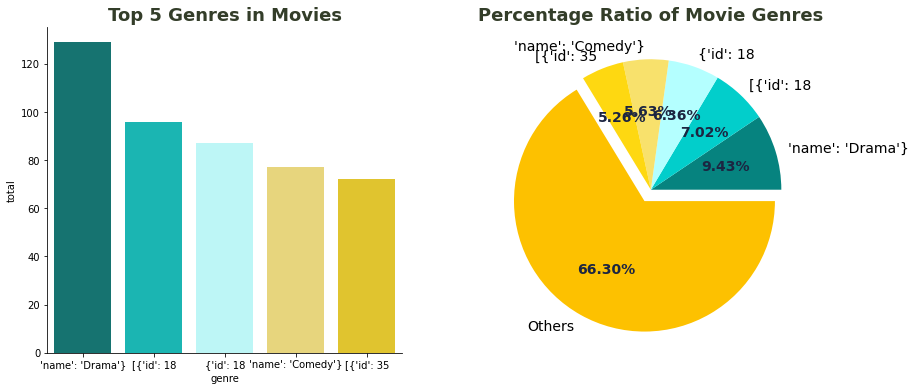

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

genres_list = []
for i in df['genres']:
    genres_list.extend(i.split(', '))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
ax = sns.barplot(data=df_plot, x='genre', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax.set_title('Top 5 Genres in Movies', fontsize=18, weight=600, color='#333d29')
sns.despine()

df_plot_full = pd.DataFrame([Counter(genres_list)]).transpose().sort_values(by=0, ascending=False)
df_plot.loc[len(df_plot)] = {'genre': 'Others', 'total':df_plot_full[6:].sum()[0]}
plt.title('Percentage Ratio of Movie Genres', fontsize=18, weight=600, color='#333d29')
wedges, texts, autotexts = axes[1].pie(x=df_plot['total'], labels=df_plot['genre'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0,0,0,0,0,0.1], colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes[1].axis('off')

Creating the TF-IDF Matrix

In [106]:
tfidf = TfidfVectorizer(stop_words="english")

tfidf_matrix = tfidf.fit_transform(df['overview'])

print(tfidf_matrix.shape)

(298, 4283)


Creating the Cosine Similarity Matrix

In [107]:
cosine_sim = cosine_similarity(tfidf_matrix,
                               tfidf_matrix)

print(cosine_sim.shape)
cosine_sim[1]


(298, 298)


array([0.01628204, 1.        , 0.05253111, 0.        , 0.        ,
       0.06419695, 0.        , 0.        , 0.13086196, 0.        ,
       0.01160623, 0.        , 0.        , 0.01171374, 0.        ,
       0.        , 0.        , 0.0295825 , 0.        , 0.        ,
       0.        , 0.        , 0.00906714, 0.        , 0.        ,
       0.02889496, 0.02679741, 0.01092294, 0.        , 0.        ,
       0.        , 0.03762413, 0.00835142, 0.00725783, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03046493, 0.        , 0.        ,
       0.02281603, 0.01088353, 0.        , 0.01783881, 0.0078276 ,
       0.        , 0.03172863, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01545836, 0.        , 0.02250888, 0.0102981 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01272245, 0.        , 0.        , 0.     

Making Suggestions Based on Similarities

In [108]:
indices = pd.Series(df.index, index=df['title'])
print('Mortal Kombat ID:',indices["Mortal Kombat"])

Mortal Kombat ID: 43


In [109]:
movie_index = indices["Mortal Kombat"]

cosine_sim[movie_index]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.07156334, 0.        ,
       0.03362342, 0.04629279, 0.        , 0.        , 0.        ,
       0.06091752, 0.        , 0.        , 0.        , 0.        ,
       0.03391153, 0.03642368, 0.02626764, 0.        , 0.        ,
       0.        , 0.        , 0.02625688, 0.        , 0.        ,
       0.        , 0.        , 0.02419418, 0.        , 0.03892812,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01717293, 0.        , 1.        , 0.        ,
       0.05064905, 0.        , 0.        , 0.        , 0.02998986,
       0.05653841, 0.        , 0.02052892, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03012068,
       0.02357531, 0.        , 0.05027734, 0.        , 0.02983375,
       0.        , 0.04250466, 0.        , 0.        , 0.        ,
       0.07052815, 0.        , 0.        , 0.04641987, 0.03116

In [110]:
similarity_scores = pd.DataFrame(cosine_sim[movie_index], columns=["score"])
similarity_scores

,score
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
293,0.000000
294,0.000000
295,0.000000
296,0.017489


All similarity scores of Mortal Kombat movie and other movies.

In [111]:
print(similarity_scores.sort_values("score", ascending=False)[1:11].index)
movie_indices = similarity_scores.sort_values("score", ascending=False)[1:11].index

Int64Index([172, 137, 225, 153, 8, 70, 244, 272, 15, 231], dtype='int64')


In [112]:
df['title'].iloc[movie_indices]

173        Living in Oblivion
138       Up Close & Personal
226         Dolores Claiborne
154            Canadian Bacon
8                Sudden Death
71      Kicking and Screaming
245          Immortal Beloved
273    Miracle on 34th Street
15                     Casino
232               French Kiss
Name: title, dtype: object

As a result, If you like the "Mortal Kombat" , You can also watch above similar movies